#Analisis de modelos de regresion

##Importacion de librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##Carga de datos

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Ruta del archivo en tu Drive
url = '/content/drive/MyDrive/Machine_learning/EV2/models_results/regression_results.parquet'

try:
    # Cargar correctamente un archivo PARQUET
    regression = pd.read_parquet(url)
    print("✅ Datos cargados exitosamente!")
except Exception as e:
    print(f"❌ Error al cargar los datos: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Datos cargados exitosamente!


##Informacion general

In [3]:
print(f'Dimensiones iniciales: {regression.shape}')

Dimensiones iniciales: (6, 8)


In [4]:
print(f'Variables disponibles: {list(regression.columns)}')

Variables disponibles: ['Model', 'Best_Params', 'RMSE', 'MAE', 'R2_Score', 'MAPE', 'CV_R2_Mean', 'CV_R2_Std']


In [5]:
display(regression)

,Model,Best_Params,RMSE,MAE,R2_Score,MAPE,CV_R2_Mean,CV_R2_Std
0,random_forest,"{'model__n_estimators': 100, 'model__min_sampl...",0.195585,0.130399,0.066877,9.664258,-0.113253,0.104056
1,gradient_boosting,"{'model__subsample': 0.7, 'model__n_estimators...",0.199363,0.130767,0.030484,9.769378,-0.059031,0.081981
2,ridge,"{'model__solver': 'svd', 'model__alpha': 100}",0.205984,0.135686,-0.034985,10.212948,-0.058696,0.041419
3,lasso,"{'model__selection': 'cyclic', 'model__alpha': 1}",0.204224,0.132939,-0.017378,10.130831,-0.024696,0.019724
4,xgboost,"{'model__subsample': 0.7, 'model__n_estimators...",0.201458,0.130968,0.009999,9.702404,-0.051317,0.081177
5,ENSEMBLE,VotingRegressor,0.196752,0.130039,0.055705,9.703438,0.055705,0.000000


##Analisis estadistico descriptivo

In [6]:
metricas_principales = ["RMSE", "MAE", "R2_Score", "MAPE", "CV_R2_Mean"]

In [7]:
summary = regression.groupby("Model")[metricas_principales].agg(["mean", "std"]).round(4)

In [8]:
formatted_summary = pd.DataFrame()
for metric in metricas_principales:
    if metric in summary.columns.levels[0]:
        formatted_summary[f"{metric} (mean ± std)"] = summary[metric].apply(
            lambda x: f"{x['mean']:.4f} ± {x['std']:.4f}", axis=1
        )

###Resumen de rendimiento

In [9]:
display(formatted_summary)

,RMSE (mean ± std),MAE (mean ± std),R2_Score (mean ± std),MAPE (mean ± std),CV_R2_Mean (mean ± std)
Model,,,,,
ENSEMBLE,0.1968 ± nan,0.1300 ± nan,0.0557 ± nan,9.7034 ± nan,0.0557 ± nan
gradient_boosting,0.1994 ± nan,0.1308 ± nan,0.0305 ± nan,9.7694 ± nan,-0.0590 ± nan
lasso,0.2042 ± nan,0.1329 ± nan,-0.0174 ± nan,10.1308 ± nan,-0.0247 ± nan
random_forest,0.1956 ± nan,0.1304 ± nan,0.0669 ± nan,9.6643 ± nan,-0.1133 ± nan
ridge,0.2060 ± nan,0.1357 ± nan,-0.0350 ± nan,10.2129 ± nan,-0.0587 ± nan
xgboost,0.2015 ± nan,0.1310 ± nan,0.0100 ± nan,9.7024 ± nan,-0.0513 ± nan


##Visualizacion comparativa

###Comparación de R² Score

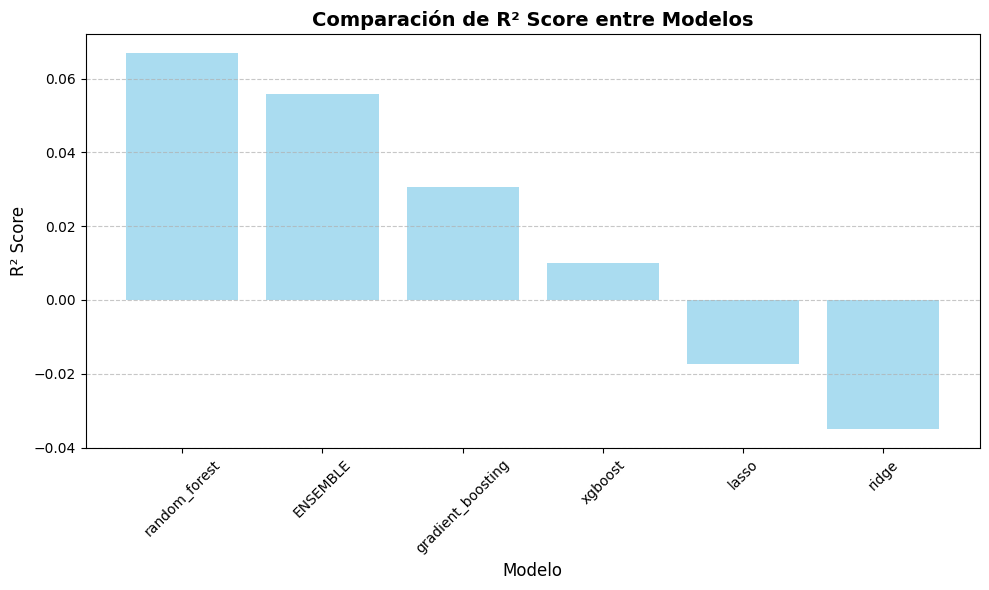

In [10]:
plt.figure(figsize=(10, 6))
r2_data = regression.groupby("Model")["R2_Score"].agg(['mean', 'std']).sort_values('mean', ascending=False)
plt.bar(r2_data.index, r2_data['mean'], yerr=r2_data['std'], capsize=5, alpha=0.7, color='skyblue')
plt.title("Comparación de R² Score entre Modelos", fontsize=14, fontweight='bold')
plt.ylabel("R² Score", fontsize=12)
plt.xlabel("Modelo", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

###Comparación de RMSE

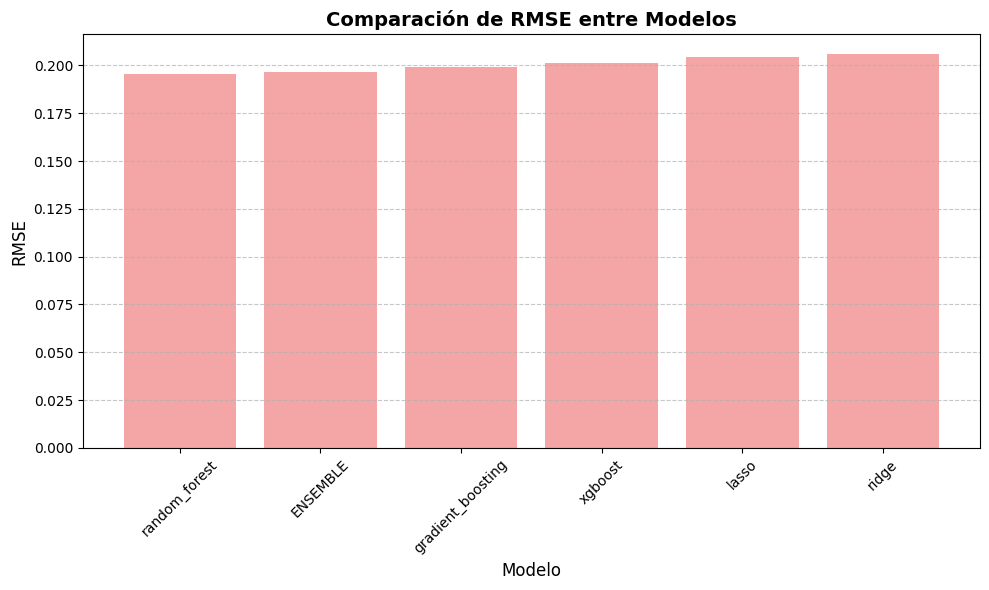

In [11]:
plt.figure(figsize=(10, 6))
rmse_data = regression.groupby("Model")["RMSE"].agg(['mean', 'std']).sort_values('mean', ascending=True)
plt.bar(rmse_data.index, rmse_data['mean'], yerr=rmse_data['std'], capsize=5, alpha=0.7, color='lightcoral')
plt.title("Comparación de RMSE entre Modelos", fontsize=14, fontweight='bold')
plt.ylabel("RMSE", fontsize=12)
plt.xlabel("Modelo", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

###Heatmap de correlación entre métricas

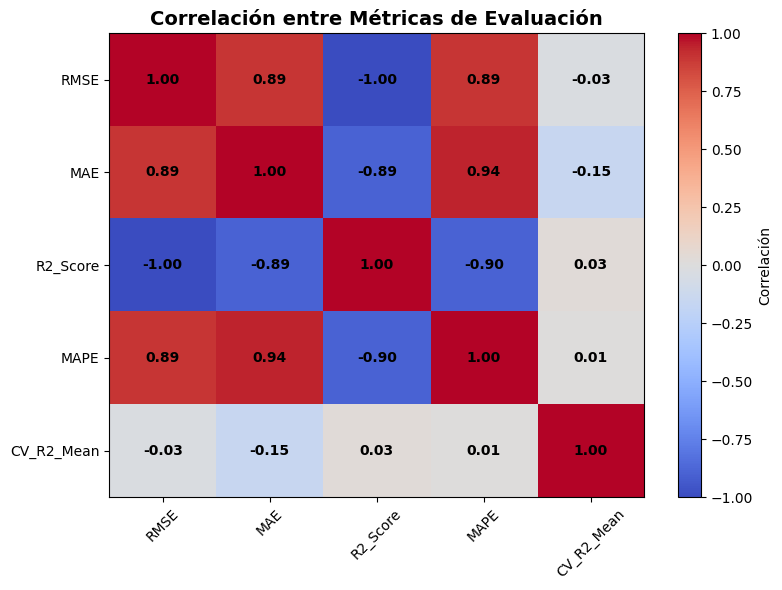

In [12]:
plt.figure(figsize=(8, 6))
correlation_matrix = regression[metricas_principales].corr()
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
plt.colorbar(label='Correlación')
plt.xticks(range(len(metricas_principales)), metricas_principales, rotation=45)
plt.yticks(range(len(metricas_principales)), metricas_principales)
plt.title("Correlación entre Métricas de Evaluación", fontsize=14, fontweight='bold')

for i in range(len(metricas_principales)):
    for j in range(len(metricas_principales)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                ha='center', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

##Identificacion de mejores modelos

###Buscar mejor modelo por R², RMSE y CV R²

In [13]:
#R²
if "R2_Score" in regression.columns:
    best_r2_idx = regression["R2_Score"].idxmax()
    best_r2_model = regression.loc[best_r2_idx, "Model"]
    best_r2_score = regression.loc[best_r2_idx, "R2_Score"]
    print(f"🔹 Mejor modelo por R² Score: {best_r2_model}")
    print(f"   R² Score: {best_r2_score:.4f}")

#RMSE
if "RMSE" in regression.columns:
    best_rmse_idx = regression["RMSE"].idxmin()
    best_rmse_model = regression.loc[best_rmse_idx, "Model"]
    best_rmse_score = regression.loc[best_rmse_idx, "RMSE"]
    print(f"\n🔹 Mejor modelo por RMSE: {best_rmse_model}")
    print(f"   RMSE: {best_rmse_score:.4f}")

#CV R²
if "CV_R2_Mean" in regression.columns:
    best_cv_idx = regression["CV_R2_Mean"].idxmax()
    best_cv_model = regression.loc[best_cv_idx, "Model"]
    best_cv_score = regression.loc[best_cv_idx, "CV_R2_Mean"]
    best_cv_std = regression.loc[best_cv_idx, "CV_R2_Std"]
    print(f"\n🔹 Mejor modelo por Validación Cruzada: {best_cv_model}")
    print(f"   CV R²: {best_cv_score:.4f} ± {best_cv_std:.4f}")

🔹 Mejor modelo por R² Score: random_forest
   R² Score: 0.0669

🔹 Mejor modelo por RMSE: random_forest
   RMSE: 0.1956

🔹 Mejor modelo por Validación Cruzada: ENSEMBLE
   CV R²: 0.0557 ± 0.0000


##Analisis de estabilidad y robustez (CV vs Test)

In [14]:
print("🔄 COMPARACIÓN: VALIDACIÓN CRUZADA vs TEST")
if all(col in regression.columns for col in ['CV_R2_Mean', 'R2_Score']):
    stability_analysis = regression[['Model', 'CV_R2_Mean', 'R2_Score']].copy()
    stability_analysis['Diferencia'] = stability_analysis['R2_Score'] - stability_analysis['CV_R2_Mean']
    stability_analysis['Overfitting_Ratio'] = stability_analysis['Diferencia'] / stability_analysis['CV_R2_Mean']
    display(stability_analysis.round(4))

🔄 COMPARACIÓN: VALIDACIÓN CRUZADA vs TEST


,Model,CV_R2_Mean,R2_Score,Diferencia,Overfitting_Ratio
0,random_forest,-0.1133,0.0669,0.1801,-1.5905
1,gradient_boosting,-0.0590,0.0305,0.0895,-1.5164
2,ridge,-0.0587,-0.0350,0.0237,-0.4040
3,lasso,-0.0247,-0.0174,0.0073,-0.2963
4,xgboost,-0.0513,0.0100,0.0613,-1.1948
5,ENSEMBLE,0.0557,0.0557,0.0000,0.0000


##Evaluacion de rendimiento

In [15]:
r2_negativos = regression[regression["R2_Score"] < 0]
if len(r2_negativos) > 0:
    print(f"\n⚠️  ADVERTENCIA: {len(r2_negativos)} modelo(s) con R² negativo")
    print("   Esto indica que el modelo es peor que usar la media simple")
    display(r2_negativos[['Model', 'R2_Score']])


⚠️  ADVERTENCIA: 2 modelo(s) con R² negativo
   Esto indica que el modelo es peor que usar la media simple


,Model,R2_Score
2,ridge,-0.034985
3,lasso,-0.017378


In [16]:
print("\n💡 RECOMENDACIONES FINALES:")
if "ENSEMBLE" in regression["Model"].values:
    ensemble_perf = regression[regression["Model"] == "ENSEMBLE"].iloc[0]
    print(f"🎯 El modelo ENSEMBLE tiene:")
    if "R2_Score" in ensemble_perf:
        print(f"   • R² Score: {ensemble_perf['R2_Score']:.4f}")
    if "RMSE" in ensemble_perf:
        print(f"   • RMSE: {ensemble_perf['RMSE']:.4f}")
    print("   ⭐ Recomendado para producción por su robustez")


💡 RECOMENDACIONES FINALES:
🎯 El modelo ENSEMBLE tiene:
   • R² Score: 0.0557
   • RMSE: 0.1968
   ⭐ Recomendado para producción por su robustez


In [17]:
print("\n🏆 MEJOR MODELO DE REGRESIÓN Y JUSTIFICACIÓN")
print("=" * 50)

# Definir la métrica principal para regresión
metrica_principal_regresion = "R2_Score"

# Encontrar el mejor modelo basado en R² Score (la métrica más importante para regresión)
if metrica_principal_regresion in regression.columns:
    mejor_modelo_regresion = regression.loc[regression[metrica_principal_regresion].idxmax()]

    print(f"🎯 EL MEJOR MODELO DE REGRESIÓN ES: {mejor_modelo_regresion['Model']}")
    print(f"📊 JUSTIFICACIÓN: Se seleccionó basado en el mayor R² Score ({mejor_modelo_regresion[metrica_principal_regresion]:.4f})")
    print("\n📈 MÉTRICAS DESTACADAS DEL MEJOR MODELO:")
    print(f"   • R² Score: {mejor_modelo_regresion['R2_Score']:.4f}")
    print(f"   • RMSE: {mejor_modelo_regresion['RMSE']:.4f}")
    print(f"   • MAE: {mejor_modelo_regresion['MAE']:.4f}")
    if 'CV_R2_Mean' in mejor_modelo_regresion:
        print(f"   • CV R²: {mejor_modelo_regresion['CV_R2_Mean']:.4f} ± {mejor_modelo_regresion['CV_R2_Std']:.4f}")
else:
    print("⚠️ No se pudo determinar el mejor modelo - métrica R² Score no disponible")


🏆 MEJOR MODELO DE REGRESIÓN Y JUSTIFICACIÓN
🎯 EL MEJOR MODELO DE REGRESIÓN ES: random_forest
📊 JUSTIFICACIÓN: Se seleccionó basado en el mayor R² Score (0.0669)

📈 MÉTRICAS DESTACADAS DEL MEJOR MODELO:
   • R² Score: 0.0669
   • RMSE: 0.1956
   • MAE: 0.1304
   • CV R²: -0.1133 ± 0.1041


##Conclusion

El modelo Random Forest emerge como el mejor regresor con un R² Score de 0.0669, indicando que explica solamente el 6.69% de la variabilidad en los datos. Esta métrica, combinada con el valor negativo de R² en validación cruzada (-0.1133), señala que el modelo actual tiene un poder predictivo muy limitado y posiblemente sufre de overfitting.

Las métricas de error (RMSE: 0.1956, MAE: 0.1304) proporcionan referencia para mejoras futuras, pero el rendimiento general se clasifica como "necesita mejora". Se recomienda urgentemente revisar el feature engineering, considerar transformaciones de variables y explorar relaciones no lineales que puedan no estar siendo capturadas adecuadamente por los modelos actuales.